In [2]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et, places
from salishsea_tools import viz_tools
import datetime as dt
import os
import re
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=mesh.variables['e1t'][0,:,:]
    e2t=mesh.variables['e2t'][0,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [12]:
print('SOG area (m^2):\n','   ', np.sum(tmaskSOG[0,0,:,:]*e1t*e2t*1e-3*1e-3))

SOG area (m^2):
     9815.361110622667


In [31]:

colorsList = [(1, 1, 1),(.3, .3, 1)]
cm1 = mpl.colors.ListedColormap(colorsList)

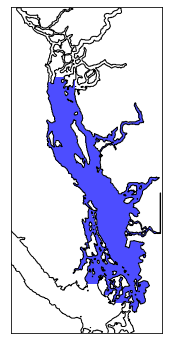

In [38]:
fig,ax=plt.subplots(1,1,figsize=(3,6))
ax.pcolormesh(tmaskSOG[0,0,:,:],cmap=cm1)
ax.contour(tmask[0,:,:],(0.5,),colors='k',linewidths=1)
viz_tools.set_aspect(ax)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim((30,398))
ax.set_ylim((200,898))
fig.savefig('mapSOGtmask.eps',dpi=100)